## Indicators of Heavy Traffic on I-94

In this project we will be examining a dataset about the westbound traffic on the [I-94 Interstate Highway.](https://en.wikipedia.org/wiki/Interstate_94) The dataset comes from the UCI Machine Learning Repository. You can download the dataset [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of this analysis is to determine a few indicators of heavy traffic on the I-94. These indicators can be weather type, time of day, time of week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.


In [16]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Adding matplotlib inline magic
%matplotlib inline

## Import and examine data

In [ ]:
# Reading and creating a dataframe
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

#Examining the dataframe
traffic.info()

Rows: 48,204 and Columns : 9

All values are non-null

From dataset documentation:

- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp : Numeric Average temp in kelvin
- rain_1h : Numeric Amount in mm of rain that occurred in the hour
- snow_1h : Numeric Amount in mm of snow that occurred in the hour
- clouds_all : Numeric Percentage of cloud cover
- weather_main : Categorical Short textual description of the current weather
- weather_description : Categorical Longer textual description of the current weather
- date_time : DateTime Hour of the data collected in local CST time
- traffic_volume : Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [4]:
display(traffic)
display(traffic.describe())

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


## Clean Data
Looking at the frequency of no rain and no snow verses some of either shows that the data set statistics for both columns are dominated by hours in which there was no precipitation. Both of these columns report millimeters per hour. The number of hours with some snow seems particularly low for this geographical region.
- Creating a column with all positive rain values shows one outlier of 9,800 mm of rain that can be removed.
- Creating a similar snow column doesn't reveal any outliers.
- The temperature column is in degrees Kelvin, which is useful in chemistry or physics but not traffic analysis. Converting to degrees Celsius would be more insightful.
- The temperature column has rows with outlier temperature values that can be removed.

In [7]:
# separate rain column by no rain or some rain
no_rain = traffic[traffic["rain_1h"] == 0]
some_rain = traffic[traffic["rain_1h"] > 0]
print("Hours with no rain: ", len(no_rain))
print("Hours with some rain", len(some_rain))
# separate snow column by no snow or some snow
no_snow = traffic[traffic["snow_1h"] == 0]
some_snow = traffic[traffic["snow_1h"] > 0]
print("Hours with no snow: ", len(no_snow))
print("Hours with some snow: ", len(some_snow))

Hours with no rain:  44737
Hours with some rain 3467
Hours with no snow:  48141
Hours with some snow:  63


In [8]:
# create a some_rain column with any rain measurements greater than 0
traffic["some_rain"] = traffic["rain_1h"][traffic["rain_1h"] > 0]
# basic stats for some_rain
display(traffic["some_rain"].describe())

count    3467.000000
mean        4.647494
std       166.970323
min         0.250000
25%         0.250000
50%         0.640000
75%         1.780000
max      9831.300000
Name: some_rain, dtype: float64

In [9]:
# remove row with outlier rain values
traffic = traffic[traffic["rain_1h"]<100]
# basic stats for some_rain
display(traffic["some_rain"].describe())

count    3466.000000
mean        1.812337
std         3.309982
min         0.250000
25%         0.250000
50%         0.640000
75%         1.780000
max        55.630000
Name: some_rain, dtype: float64

In [10]:
# create a some_snow column with any snow measurements greater than 0
traffic["some_snow"] = traffic["snow_1h"][traffic["snow_1h"] > 0]
# basic stats for some_snow
display(traffic["some_snow"].describe())

count    63.000000
mean      0.170159
std       0.149941
min       0.050000
25%       0.060000
50%       0.100000
75%       0.250000
max       0.510000
Name: some_snow, dtype: float64

In [11]:
# convert temperature column from Kelvin to Celsius
def k_to_c(k_temp):
    c_temp = k_temp - 273.15
    return c_temp

traffic["temp"] = traffic["temp"].map(k_to_c)
display(traffic["temp"].describe())

count    48203.000000
mean         8.055437
std         13.338030
min       -273.150000
25%         -0.990000
50%          9.300000
75%         18.656000
max         36.920000
Name: temp, dtype: float64

In [12]:
# remove rows with outlier temperatures
traffic = traffic[traffic["temp"]>-40]
display(traffic["temp"].describe())

count    48193.000000
mean         8.113786
std         12.709364
min        -29.760000
25%         -0.970000
50%          9.310000
75%         18.660000
max         36.920000
Name: temp, dtype: float64

# Analyzing the data

### Overal traffic volume

The previous statistics for traffic volume shows that the minimum value is 0, the maximum value is 7280, and the average is 3259. The histogram shows volume traffic has an asymmetric distribution, with (0 to 500) and (4500 to 5500) vehicles per hour as the most frequent catefories and (6500 to 7500) as the least frequent category which shows exteremly heavy traffics are rare in comparison.

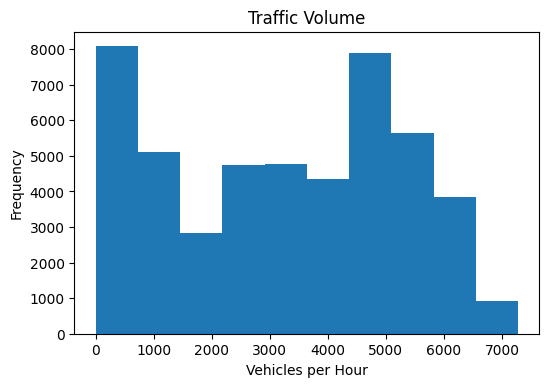

In [21]:
# create histogram of traffic volume for entire data set
traffic["traffic_volume"].plot.hist()
plt.xlabel("Vehicles per Hour")
plt.title('Traffic Volume')
plt.show()

### Day vs. Night

We will proceed by dividing our dataset into two parts:
- Daytime data: hours from 7 a.m. to 6 p.m. 
- Nighttime data: hours from 7 p.m. to 6 a.m. 

The histograms  show:
- a left skewed normal distribution for daytime traffic, with the mean traffic volume of about 4,600 vehicles per hour.
- a right skewed distribution for nighttime traffic. The mean traffic volume is a little less than 1,800 vehicles per hour.
- The obervations also show that traffic volume is low at night time between the stations. If we want to analyze heavy traffic indicators, then using daytime data can yield better results.

In [26]:
# transform column to datetime
traffic["date_time"] = pd.to_datetime(traffic["date_time"])
# create date_time series
day_night = traffic["date_time"].dt.hour
# create day traffic series from 0700 to 1800
day_traffic = day_night.between(7, 18)
day_traffic = traffic.loc[day_traffic].copy()
# create night traffic series from 1900 to 0600
night_traffic = day_night.between(19, 24) | day_night.between(0, 6)
night_traffic = traffic.loc[night_traffic].copy()
# verify
print("number of day series data : ", day_traffic.shape[0])
print("number of night series data : ", night_traffic.shape[0])

number of day series data :  23874
number of night series data :  24319


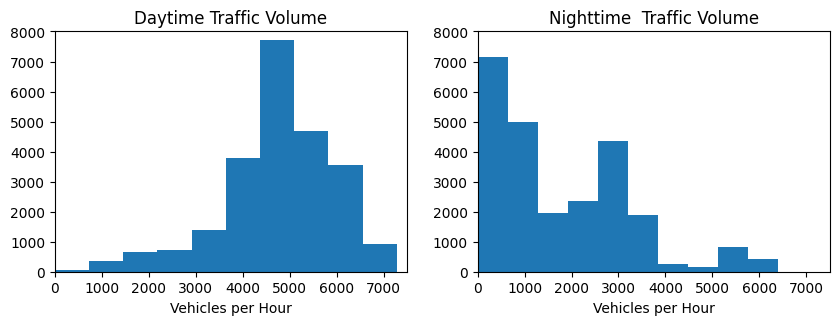

In [29]:
# create two graphs
plt.figure(figsize=(10,7))
# daytime traffic volume histogram
plt.subplot(2,2,1)
day_traffic["traffic_volume"].plot.hist()
plt.title("Daytime Traffic Volume")
plt.xlabel("Vehicles per Hour")
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.ylabel("")
# nighttime traffic volume histogram
plt.subplot(2,2,2)
night_traffic["traffic_volume"].plot.hist()
plt.title("Nighttime  Traffic Volume")
plt.xlabel("Vehicles per Hour")
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.ylabel("")
plt.show()

In [37]:
# basic daytime and nighttime stats
print("\033[1m" + 'Day_traffic description')
display(day_traffic.describe())
print("\033[1m" + 'Night_traffic description')
display(night_traffic.describe())

Day_traffic description


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,some_rain,some_snow
count,23874.000000,23874.000000,23874.000000,23874.000000,23874.000000,1770.000000,34.000000
mean,9.130410,0.121328,0.000253,53.125534,4762.303761,1.636486,0.177941
std,13.045731,0.880427,0.008854,37.563534,1174.181562,2.824868,0.155345
min,-29.760000,0.000000,0.000000,0.000000,0.000000,0.250000,0.050000
25%,-0.470000,0.000000,0.000000,5.000000,4253.000000,0.250000,0.060000
50%,10.630000,0.000000,0.000000,75.000000,4820.000000,0.640000,0.100000
75%,20.290000,0.000000,0.000000,90.000000,5559.000000,1.690000,0.302500
max,36.920000,44.450000,0.510000,100.000000,7280.000000,44.450000,0.510000


Night_traffic description


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,some_rain,some_snow
count,24319.000000,24319.000000,24319.000000,24319.000000,24319.000000,1696.000000,29.000000
mean,7.115766,0.139191,0.000192,45.687035,1785.530943,1.995861,0.161034
std,12.288987,1.111052,0.007435,40.046399,1441.868127,3.741990,0.145537
min,-28.930000,0.000000,0.000000,0.000000,0.000000,0.250000,0.050000
25%,-1.440000,0.000000,0.000000,1.000000,530.500000,0.250000,0.050000
50%,8.230000,0.000000,0.000000,40.000000,1287.000000,0.670000,0.100000
75%,17.550000,0.000000,0.000000,90.000000,2819.000000,1.850000,0.250000
max,34.530000,55.630000,0.510000,100.000000,6386.000000,55.630000,0.510000


### Daytime Group
Looking at daytime values provides following information:

- The mean traffic volume by month is not that far off the mean traffic volume for all day entries, 4762.The standard deviation between the months is only 190.
- The graph does show two dips, with one corresponding to winter months in the US. The other looks like it occurs during July, which is unusual because that's during the summer when traffic tends to be high.
    - A closer look at the annual distribution for the month of July shows an atypical decrease in 2016. A quick google search points to a large highway construction project taking place that year. https://www.mprnews.org/story/2016/07/22/i94-stpaul-shutdown-twin-cities-weekend-road-woes
- The mean daytime traffic volume does change considerably depending on the day of the week. Saturday shows a considerable dip and Sunday a little more. But there are still plenty of cars making the drive!
- Looking at the traffic volume for weekdays by hour indicates a peak in the morning (by 7:00 am if not earlier) and again in the afternoon at 4:00 pm.
- A similar look at weekend hours shows a slow build in the morning with fairly steady traffic until evening.

count      12.000000
mean     4767.503708
std       189.944859
min      4374.834566
25%      4676.730815
50%      4880.096353
75%      4907.951131
max      4928.302035
Name: traffic_volume, dtype: float64

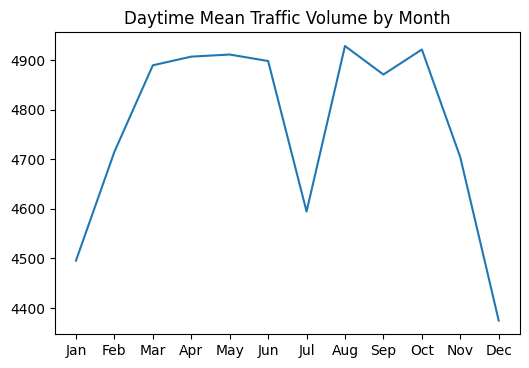

In [38]:
# create month column and convert info in date_time column to months 1-12
day_traffic["month"] = day_traffic["date_time"].dt.month
# group daytime by month and get the mean column values for each month
day_traffic_month_group = day_traffic.groupby("month").mean()
# basic stats for daytime month group mean traffic volume
display(day_traffic_month_group["traffic_volume"].describe())
# line plot of daytime month group mean traffic volumes
day_traffic_month_group["traffic_volume"].plot.line()
plt.title("Daytime Mean Traffic Volume by Month")
plt.xlabel("")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun",
                                         "Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

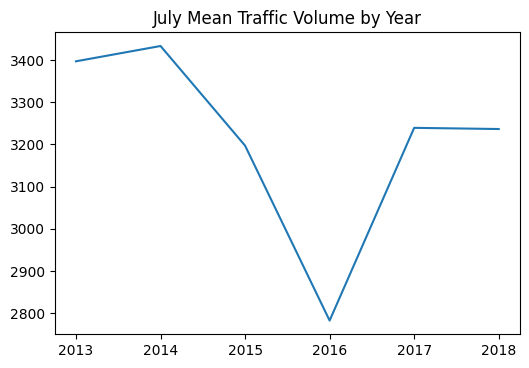

In [51]:
# group July by year
july_months = traffic[traffic["date_time"].dt.month == 7]
july_yearly_group = july_months.groupby(traffic["date_time"].dt.year)
# line plot of July yearly group mean traffic volume
july_yearly_group["traffic_volume"].mean().plot.line()
plt.title("July Mean Traffic Volume by Year")
plt.xlabel("")
plt.show()

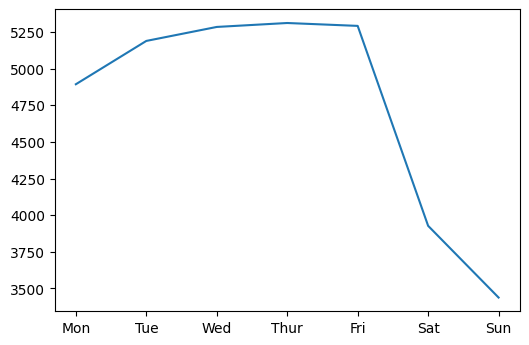

In [50]:
# create day_of_week column and convert info in date_time column to days 0-6
day_traffic['day_of_week'] = day_traffic.date_time.dt.dayofweek
# group daytime by day of week and get the mean column values for each day
traffic_by_day = day_traffic.groupby('day_of_week').mean()
# line plot of daytime week of day group mean traffic volumes
traffic_by_day['traffic_volume'].plot()
plt.xlabel('')
plt.xticks([0,1,2,3,4,5,6],["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.show()

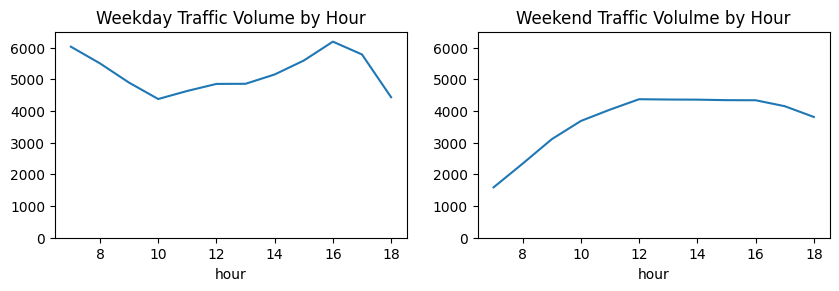

In [53]:
# create an hour column and convert info in date_time column to hours 0 to 23
day_traffic["hour"] = day_traffic["date_time"].dt.hour
# group daytime into weekdays (4=Friday) and weekends (5=Saturday)
weekdays = day_traffic[day_traffic["day_of_week"] <= 4]
weekends = day_traffic[day_traffic["day_of_week"] >= 5]
# group weekday entries by hour and get the mean column values for each hour
weekdays_hours_group = weekdays.groupby("hour").mean()
# group weekend entries by hour and get the mean column values for each hour
weekends_hours_group = weekends.groupby("hour").mean()
# basic stats for daytime weekday hour group mean traffic volume
# display(weekdays_hours_group["traffic_volume"].describe())
# create two graphs
plt.figure(figsize=(10,6))
# line plot of weekdays hours group mean traffic volumes 
plt.subplot(2,2,1)
weekdays_hours_group["traffic_volume"].plot.line()
plt.title("Weekday Traffic Volume by Hour")
plt.ylim(0,6500)
# line plot of weekends hours group mean traffic volumes
plt.subplot(2,2,2)
weekends_hours_group["traffic_volume"].plot.line()
plt.title("Weekend Traffic Volulme by Hour")
plt.ylim(0,6500)
plt.show()

## Weather

### Part 1

There are small correlations between daytime traffic volume and measurable amounts of snow and rain. Neither of these associations would be obvious though.

The snow correlation is probably just an artifact due to the low sample number.
The subtle relationship between rain and traffic volume appears from the scatter chart to be less causation than simple correlation. It is likely that there are simply a fair number of rainy days in this area.

In [2]:
# Pearson correlation coefficient for traffic_volume
day_traffic.corr()['traffic_volume']

NameError: name 'day_traffic' is not defined

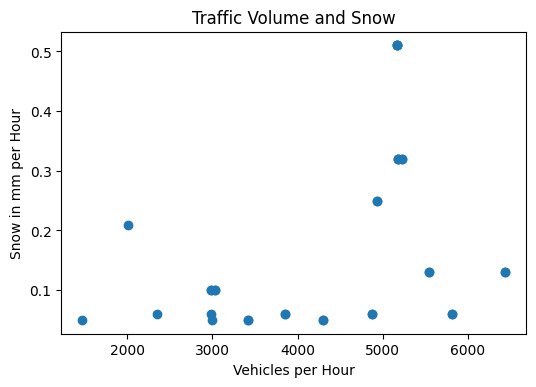

In [68]:
# scatter plot for daytime traffic volume and some snow
plt.scatter(day_traffic["traffic_volume"],day_traffic["some_snow"])
plt.title("Traffic Volume and Snow")
plt.xlabel("Vehicles per Hour")
plt.ylabel("Snow in mm per Hour")
plt.show()

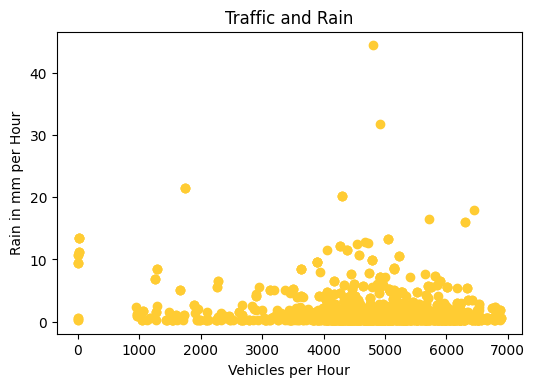

In [61]:
# scatter plot for daytime traffic volume and some rain
plt.scatter(day_traffic["traffic_volume"], day_traffic["some_rain"],c="#FFCC33")
plt.title("Traffic and Rain")
plt.xlabel("Vehicles per Hour")
plt.ylabel("Rain in mm per Hour")
plt.show()

### Part 2
- Grouping daytime traffic by the categorical options in the weather_main column provides an interesting graph but no real insight. The traffic volume seems to be fairly similar across the group.
- Grouping daytime traffic by the categorical options in the weather_description doesn't reveal any surprises either. The highest traffic volumes were on days with snow.

In [63]:
# group day traffic by weather main and weather description
weather_main = day_traffic.groupby("weather_main").mean()
weather_description = day_traffic.groupby("weather_description").mean()

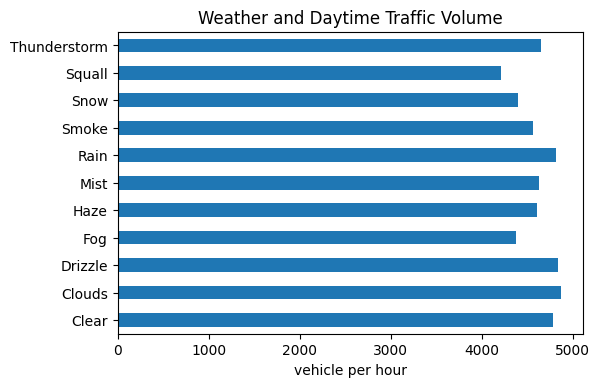

In [65]:
# bar chart for weather main
weather_main["traffic_volume"].plot.barh()
plt.ylabel("")
plt.xlabel("vehicle per hour")
plt.title("Weather and Daytime Traffic Volume")
plt.show()

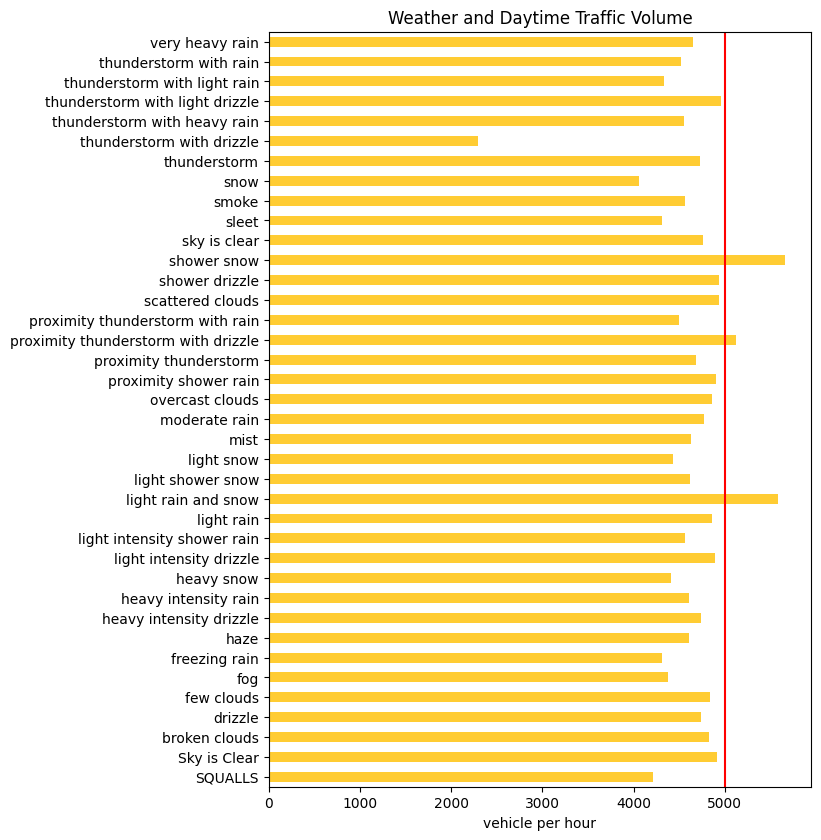

In [67]:
# bar chart for weather description
weather_description["traffic_volume"].plot.barh(figsize=(7,10), color="#FFCC33")
plt.xlabel("vehicle per hour")
plt.ylabel("")
plt.title("Weather and Daytime Traffic Volume")
plt.axvline(5000,color ='red')
plt.show()

# Conclusion

### 1. Time Realted
- Traffic is busier during daytime compared to night time.
- Traffic seems to be heavy during warmer months from March -October.
- Traffic seems to less busier during colder months of November -February.
- Traffic drops significantly over the weekend compared to weekdays. In weekdays, Monday tends to have slightly lesser number of cars on the road. Rest other weekdays traffic is heavy.
- On business days from Monday to Friday, rush hours are at 7 am in the morning and then between 3 to 5 pm.
- On Weekends, traffic volume is low throughout and does not even reach 5000. It picks up a bit around noon stays pretty steady. It corresponds to weekend leasure commutes most likely.

### 2. Weather Realted
Weather descriptions where traffic volume exceeds 5000 cars are during:

- Snow ShowersLight rain and snow 
- Proximity thunderstorm with drizzle